In [ ]:
! pip install pykml
! pip install rioxarray
! pip install Shapely
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 32 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 1.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.3 MB 7.6 MB/s 
     |████████████████████████████████| 19.3 MB 451 kB/s 
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54611 sha256=e2b560e5c273370adcb7f669f2ede00eba790b7233d10d599e52d32629d410a5
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-pyt

In [ ]:
from pykml import parser
import csv
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import random
%matplotlib inline

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
kml_file = r"/content/drive/My Drive/Colab Notebooks/MACS 37000/final project/image_cropping/IL_kml/cb_2018_17_tract_500k.kml"

In [17]:
with open(kml_file) as f:
    folder = parser.parse(f).getroot().Document.Folder

In [18]:
boundary_result = {}

for pm in folder.Placemark:
    try:
        cor_text = pm.Polygon.outerBoundaryIs.LinearRing.coordinates.text
        geo_id = pm.ExtendedData.SchemaData.SimpleData[4].text
        cor_text_lst = cor_text.replace('0.0','').rstrip(',').split(',')
        pointer0 = 0
        pointer1 = 1
        cor_lst = []

        for i in range(len(cor_text_lst)):
            if i + pointer0 <= len(cor_text_lst) - 2:
                cor_lst.append((float(cor_text_lst[i+pointer0]), float(cor_text_lst[i+pointer1])))
                pointer0 += 1
                pointer1 += 1
        boundary_result[geo_id] = cor_lst
    except:
        pass

In [19]:
len(boundary_result)

3120

In [34]:
boundary_result

{'17001000100': [(-91.377662, 39.941598),
  (-91.377654, 39.940376),
  (-91.377638, 39.936672),
  (-91.377641, 39.935432),
  (-91.36775, 39.935261),
  (-91.358216, 39.935198),
  (-91.339331, 39.935096),
  (-91.333317, 39.93529),
  (-91.329891, 39.935095),
  (-91.329797, 39.937983),
  (-91.329718, 39.944257),
  (-91.329734, 39.94901),
  (-91.330487, 39.949594),
  (-91.333745, 39.949618),
  (-91.331834, 39.953238),
  (-91.331479, 39.954924),
  (-91.330982, 39.963945),
  (-91.354499, 39.964432),
  (-91.357975, 39.963333),
  (-91.357983, 39.9645),
  (-91.362733, 39.964526),
  (-91.367579, 39.964581),
  (-91.372843, 39.964605),
  (-91.373016, 39.964606),
  (-91.377337, 39.964591),
  (-91.377404, 39.960643),
  (-91.377476, 39.95575),
  (-91.377527, 39.951949),
  (-91.377547, 39.950264),
  (-91.377595, 39.946645),
  (-91.377662, 39.941598)],
 '17001000201': [(-91.396463, 39.956207),
  (-91.396552, 39.95044),
  (-91.393683, 39.950422),
  (-91.393696, 39.946776),
  (-91.377595, 39.946645),
  (-

In [44]:
dic = {'tract_id':[],'area':[]}
for k,v in boundary_result.items():
  dic['tract_id'].append(k)
  dic['area'].append(Polygon(v).area)

In [45]:
dic

{'area': [0.0013626006115000902,
  0.00033786958949997474,
  0.00015972361799993138,
  0.000491692032500062,
  0.00013312165050004694,
  0.00028800993400001235,
  0.00018111812386189667,
  0.0003536443007199972,
  0.00019060657399993117,
  0.00017157211149996962,
  0.00032288877750014273,
  0.0013509047020000009,
  125732969524.21301,
  90310.07969560957,
  90180.28586096785,
  89708.6099965509,
  66908064071.52792,
  0.022801944904609257,
  0.029236900960775927,
  0.030979090444546057,
  0.0047148097118096845,
  0.001474082556312994,
  0.026414686631499897,
  0.0016375886149998867,
  0.034011638864000375,
  0.04087154578399874,
  0.0010253930840000243,
  0.0005812423900000129,
  0.0004314515850000549,
  0.023723453673999726,
  0.015216525400000026,
  0.029116475195493676,
  0.00969845242850019,
  40327.73533944007,
  0.001705123404500154,
  0.03898521606400065,
  0.05809777599100063,
  0.020156545041999978,
  0.031463447573999645,
  0.0049121831719999105,
  0.0017827998529999355,
  0.

In [48]:
df = pd.DataFrame(dic)
df

,tract_id,area
0,17001000100,0.001363
1,17001000201,0.000338
2,17001000202,0.000160
3,17001000400,0.000492
4,17001000500,0.000133
...,...,...
3115,17203030501,0.004758
3116,17203030502,0.006165
3117,17203030601,0.011470
3118,17203030602,0.020466


In [47]:
%cd /content/drive/My Drive/Colab Notebooks/object_detection/

/content/drive/My Drive/Colab Notebooks/object_detection


In [49]:
df.to_csv('chicago_tract_area.csv',index=False)

## Plot one instance

In [27]:
tract_geo = '17031480200'
poly = boundary_result[tract_geo]

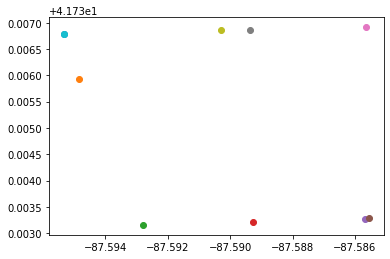

In [28]:
for i, j in poly:
    plt.scatter(i, j)

In [29]:
poly

[(-87.595308, 41.736783),
 (-87.594829, 41.735934),
 (-87.592797, 41.733159),
 (-87.589269, 41.733219),
 (-87.585677, 41.733266),
 (-87.585567, 41.733281),
 (-87.585637, 41.736913),
 (-87.589346, 41.736864),
 (-87.590276, 41.736852),
 (-87.595308, 41.736783)]

In [30]:
# calculate polygon areas

from shapely.geometry import Polygon
pgon = Polygon(poly) # Assuming the OP's x,y coordinates

print(pgon.area)

3.104769000001174e-05


In [31]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [32]:
x1 = [x for x,y in poly]
y1 = [y for x,y in poly]

In [33]:
PolyArea(x1,y1)

3.1047689844854176e-05

In [ ]:
top_lat = max(poly, key=lambda  x:x[1])[1]
bottom_lat = min(poly, key=lambda x:x[1])[1]
right_lon = max(poly, key=lambda  x:x[0])[0]
left_lon = min(poly, key=lambda  x:x[0])[0]

In [ ]:
print(left_lon, right_lon, top_lat, bottom_lat)

-87.585637 -87.565914 41.737193 41.733281


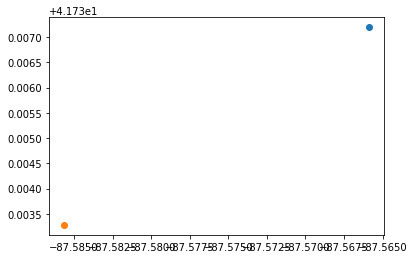

In [ ]:
plt.scatter(right_lon, top_lat)
plt.scatter(left_lon, bottom_lat)

## Crop the images

In [ ]:
import os
import rioxarray
import geopandas as gpd
from shapely.geometry import Polygon
import cv2

In [ ]:
path = r'/content/drive/MyDrive/Current/images/Chicago/raw'
destination = r'/content/drive/MyDrive/Current/images/Chicago/cropped'

In [ ]:
categories = os.listdir(path)

In [ ]:
error_img = []

for c in categories:
  imgs = os.path.join(path, c)
  for img in os.listdir(imgs):
    # crop each image
    png = img.strip('.tif') + '.png'
    if png in os.listdir(os.path.join(destination, c)):
      continue
    try:
      raster = rioxarray.open_rasterio(os.path.join(imgs, img))
      polygon_geom = Polygon(boundary_result[img.strip('.tif')])
      polygon = gpd.GeoDataFrame(index=[0], crs=raster.rio.crs, geometry=[polygon_geom])
      raster_clip_polygon = raster.rio.clip(polygon['geometry'], polygon.crs)
      # save each image
      img_np = raster_clip_polygon.to_numpy()
      img_arr = np.moveaxis(img_np, 0, -1)
      folder = os.path.join(destination, c)
      cv2.imwrite(os.path.join(folder, img.strip('.tif') + '.png'), cv2.cvtColor(img_arr, cv2.COLOR_RGB2BGR))
    except:
      error_img.append(os.path.join(imgs, img))
      pass

In [ ]:
len(os.listdir(os.path.join(destination, categories[0])))

640

In [ ]:
import rioxarray

# Load image and visualize
raster = rioxarray.open_rasterio(r'/content/drive/MyDrive/MACS 37000 Project/images_training/Current/images/Chicago/raw/non-gentrified/17031020301.tif')
raster.plot.imshow()

RasterioIOError: ignored

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon

In [ ]:
polygon_geom = Polygon(poly)

In [ ]:
polygon = gpd.GeoDataFrame(index=[0], crs=raster.rio.crs, geometry=[polygon_geom])

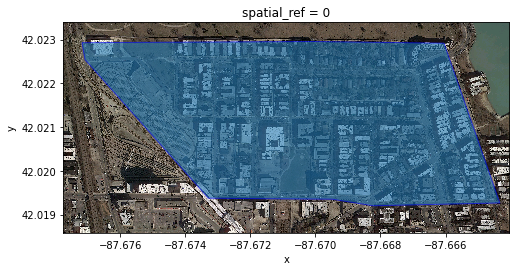

In [ ]:
# Plot the polygon over raster
fig, ax = plt.subplots()
fig.set_size_inches((8,8))
raster.plot.imshow(ax=ax)
polygon.plot(ax=ax, edgecolor='blue', alpha=0.6)

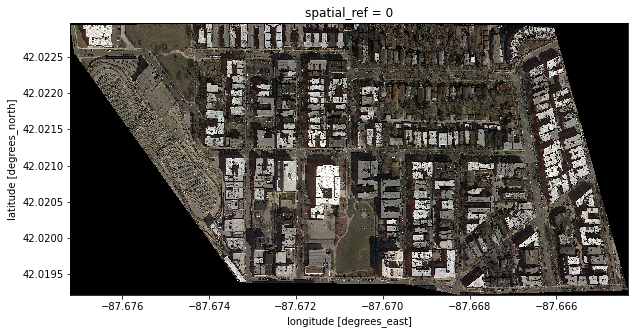

In [ ]:
# Crop and visualize
raster_clip_polygon = raster.rio.clip(polygon['geometry'], polygon.crs)
raster_clip_polygon.plot.imshow(figsize=(10,5))

## Save the cropped image

In [ ]:
type(raster_clip_polygon)

xarray.core.dataarray.DataArray

In [ ]:
# change the data to numpy array

img_np = raster_clip_polygon.to_numpy()
type(img_np), img_np.shape

(numpy.ndarray, (3, 1400, 4793))

In [ ]:
# reshape the data to make the channel at the last axis

img_arr = np.moveaxis(img_np, 0, -1)
img_arr.shape

(1400, 4793, 3)

In [ ]:
# save the numpy array to image file

import cv2

cv2.imwrite('test.png', cv2.cvtColor(img_arr, cv2.COLOR_RGB2BGR))

True